In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris_df = sns.load_dataset('iris')
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
iris_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [17]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
iris_df.groupby('species').species.count()

species
setosa        45
versicolor    49
virginica     49
Name: species, dtype: int64

In [15]:
iris_df.species = pd.Categorical(iris_df['species'])
iris_df.species = iris_df.species.cat.codes

In [16]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [21]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:xlabel='sepal_length', ylabel='count'>

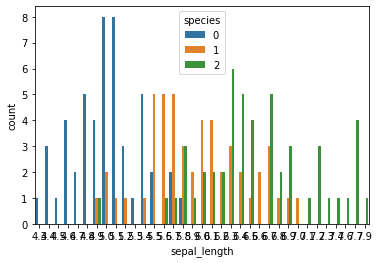

In [22]:
sns.countplot(x='sepal_length',hue='species',data=iris_df)

<AxesSubplot:xlabel='sepal_width', ylabel='count'>

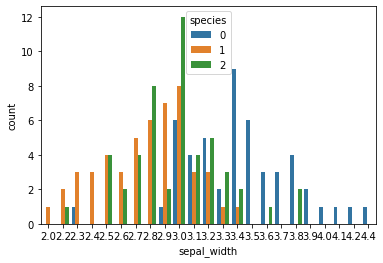

In [23]:
sns.countplot(x='sepal_width',hue='species',data=iris_df)

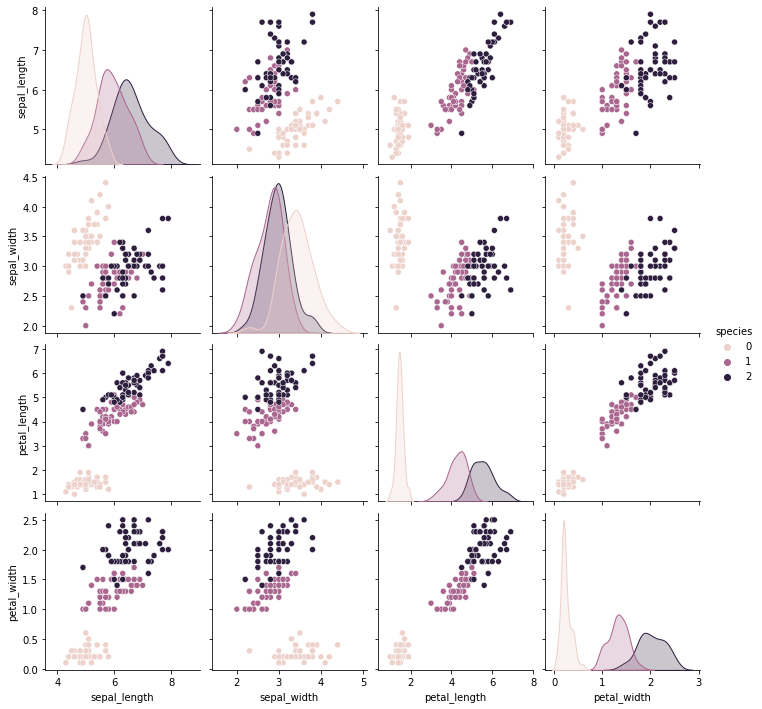

In [24]:
sns.pairplot(iris_df, hue="species")

In [3]:
def detect_outlier(species, column):
    rows = iris_df[iris_df['species'] == species]
    column_values = rows[column]
    Q1 = column_values.quantile(0.25)
    Q3 = column_values.quantile(0.75)
    IQR = Q3 - Q1  
    low_outlier = Q1 - (1.5 * IQR)
    high_outlier = Q3 + (1.5 * IQR)
    lower = rows[rows[column] < low_outlier]
    higher = rows[rows[column] > high_outlier]
    iris_df.drop(lower.index, inplace=True, axis=0)
    iris_df.drop(higher.index, inplace=True, axis=0)

columns = ['sepal_length', 'sepal_width','petal_length','petal_width']
speciess = iris_df['species'].unique()
for dis in speciess:
    for col in columns:
        detect_outlier(dis, col)

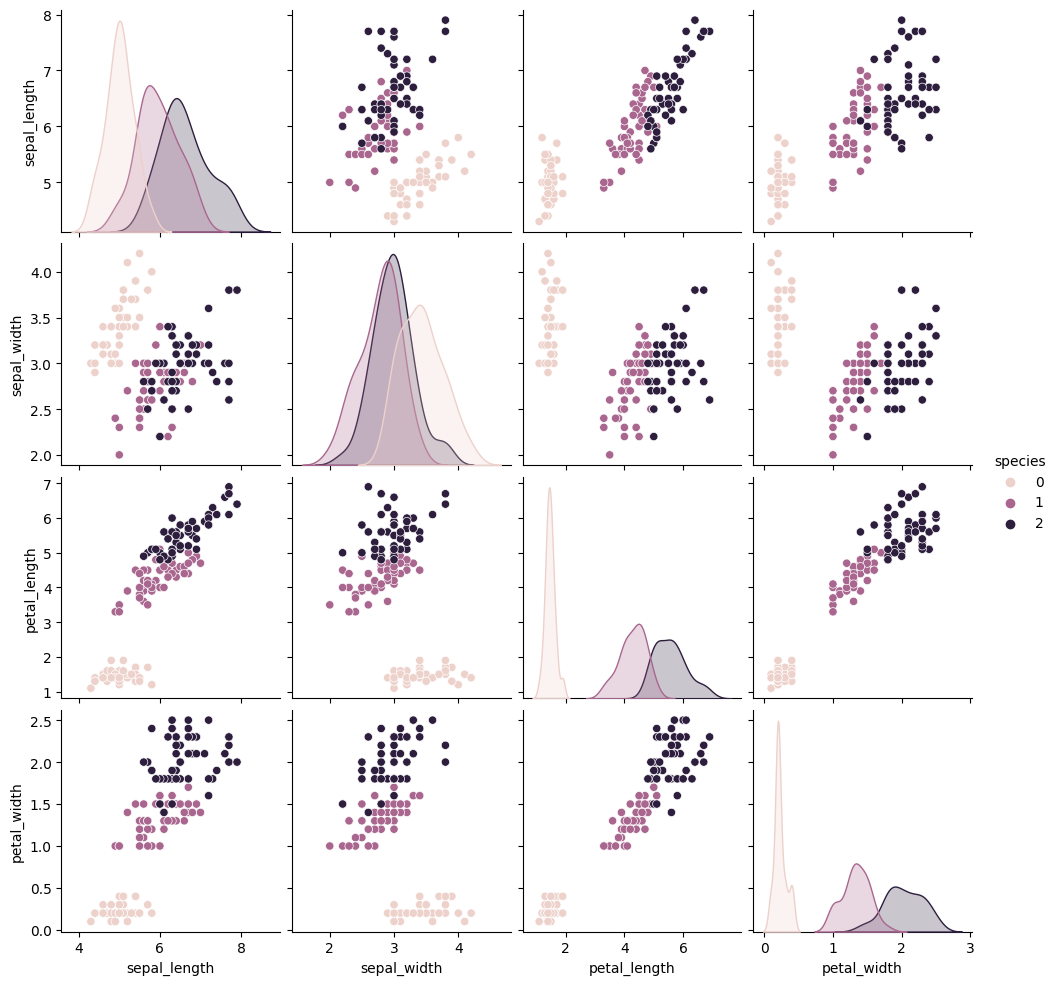

In [17]:
sns.pairplot(iris_df, hue="species")

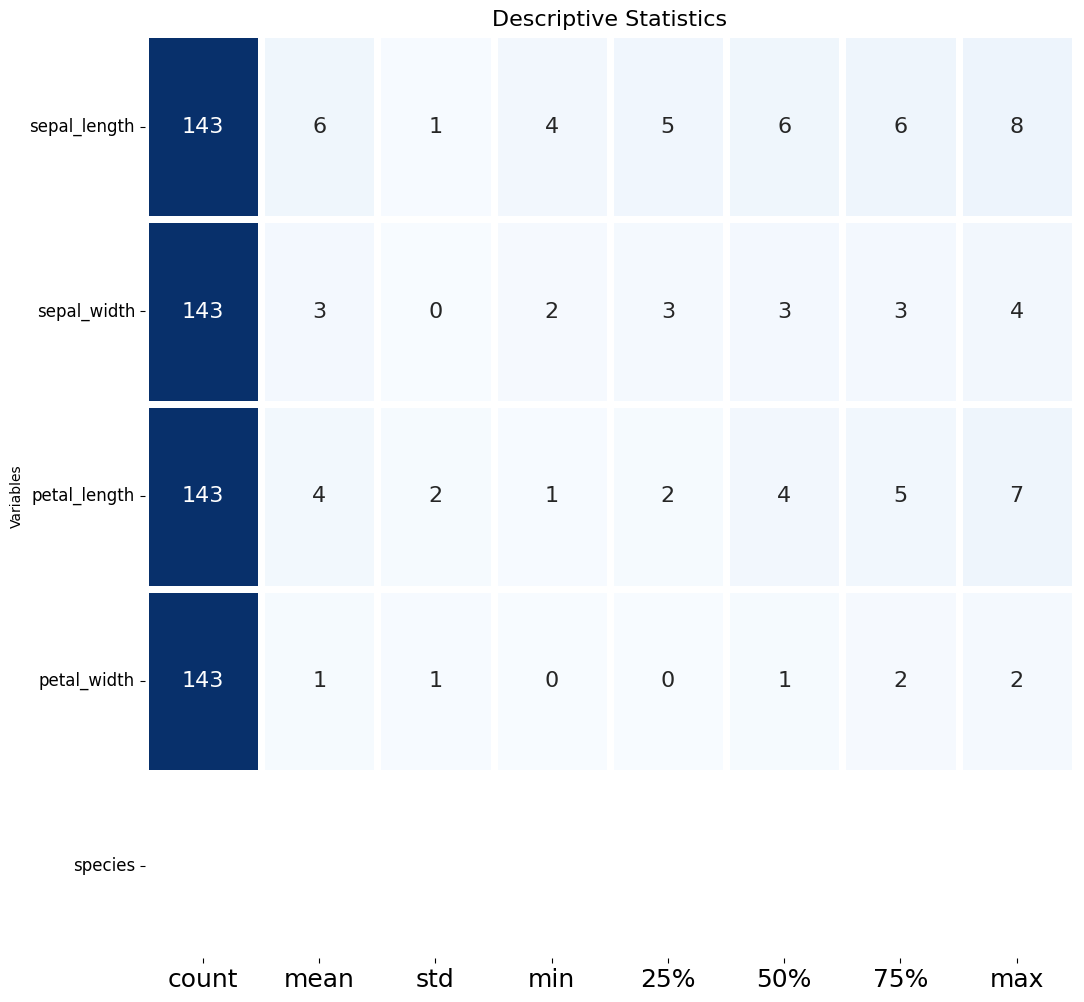

In [5]:
desc=iris_df.describe().T
df1 = pd.DataFrame(index=['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
                          'species'], 
                   columns= ["count","mean","std","min",
                             "25%","50%","75%","max"], data= desc )

f,ax = plt.subplots(figsize=(12,12))

sns.heatmap(df1, annot=True,cmap = "Blues", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

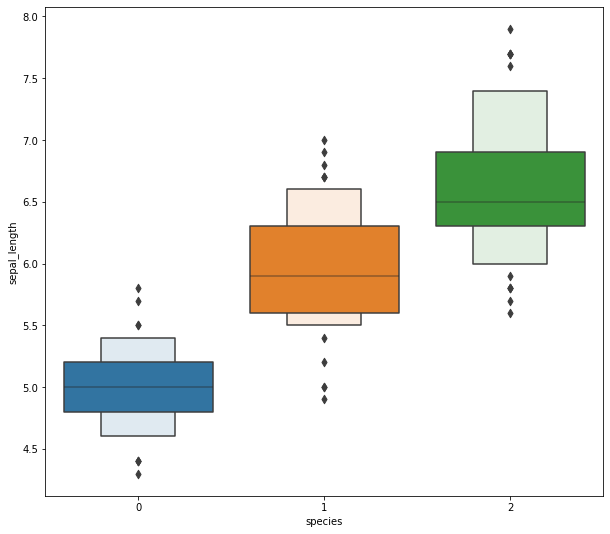

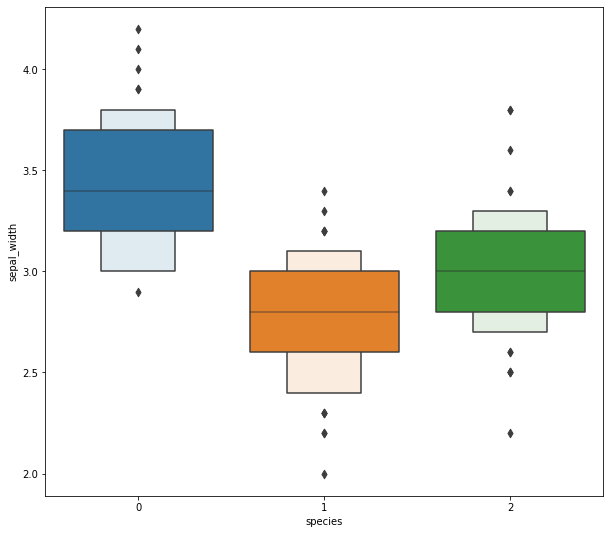

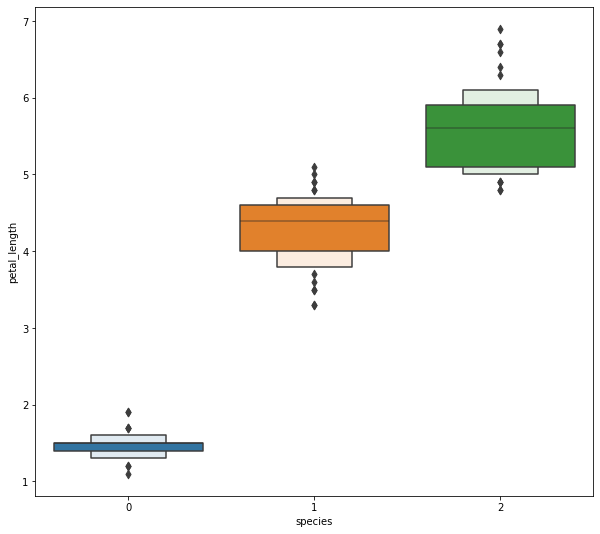

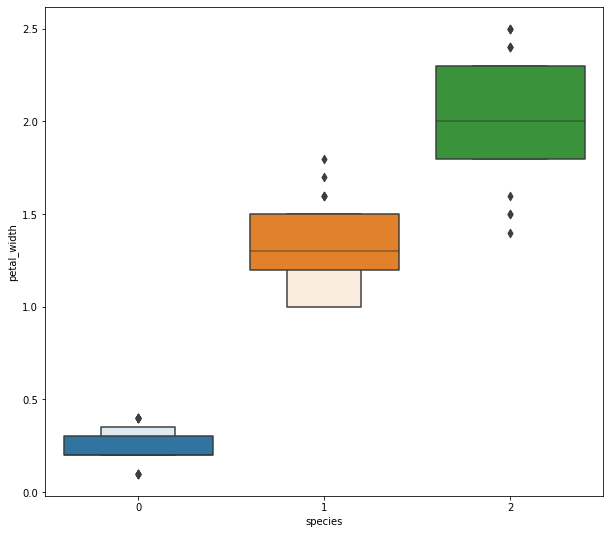

In [29]:
columns = ['sepal_length', 'sepal_width','petal_length','petal_width']
for i in columns:
    plt.figure(figsize=(10,9))
    sns.boxenplot(x= 'species', y =i, data=iris_df)
    



In [30]:
iris_df.groupby('species').mean().sepal_length

species
0    5.008889
1    5.953061
2    6.622449
Name: sepal_length, dtype: float64

In [31]:
iris_df.groupby('species').mean().sepal_width

species
0    3.428889
1    2.775510
2    2.983673
Name: sepal_width, dtype: float64

In [32]:
iris_df.groupby('species').mean().petal_length

species
0    1.466667
1    4.285714
2    5.573469
Name: petal_length, dtype: float64

In [33]:
iris_df.groupby('species').mean().petal_width

species
0    0.228889
1    1.330612
2    2.032653
Name: petal_width, dtype: float64

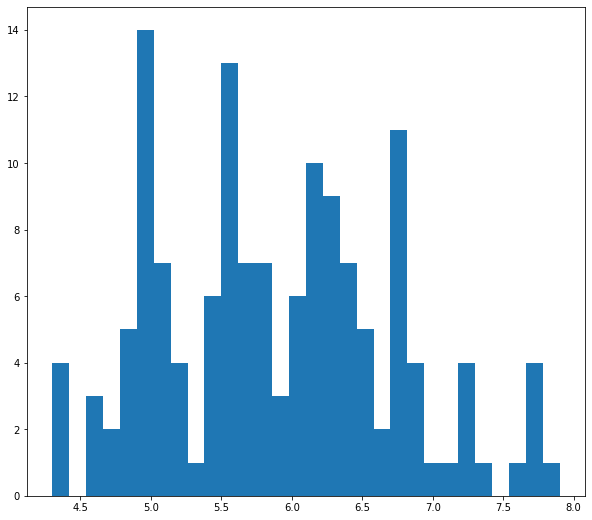

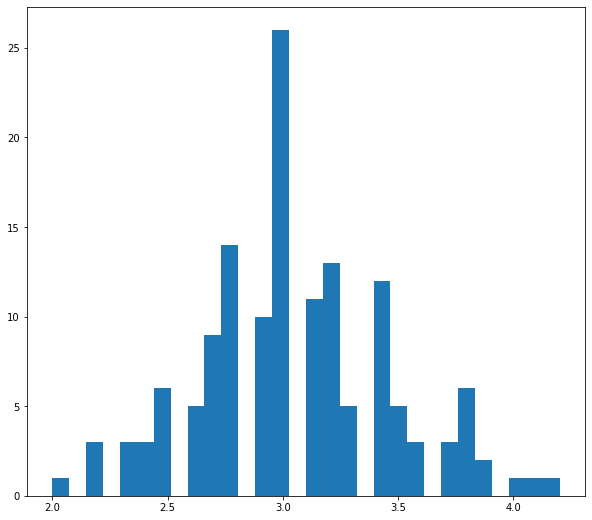

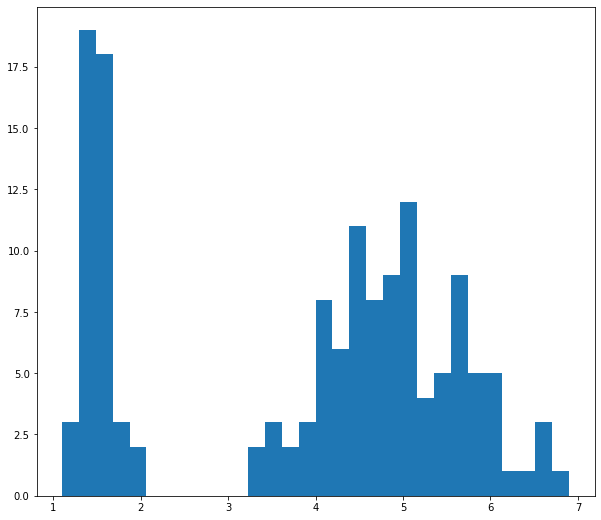

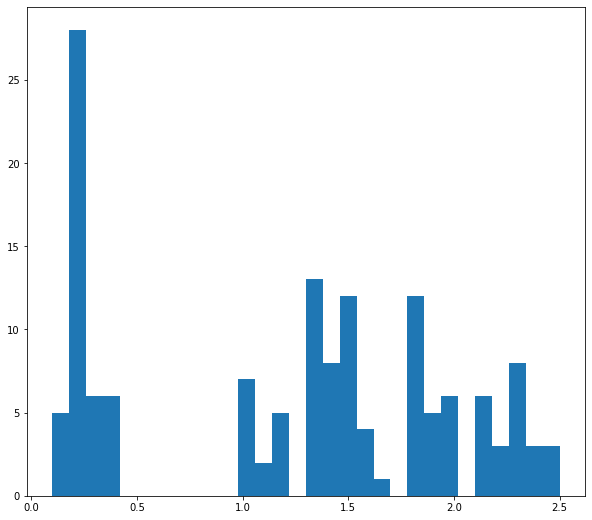

In [34]:
columns = ['sepal_length', 'sepal_width','petal_length','petal_width']
for i in columns:
    plt.figure(figsize=(10,9))
    plt.hist(iris_df[i], bins=30)

In [35]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
iris_df.species = pd.Categorical(iris_df['species'])
iris_df.species = iris_df.species.cat.codes

In [27]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  143 non-null    float64
 1   sepal_width   143 non-null    float64
 2   petal_length  143 non-null    float64
 3   petal_width   143 non-null    float64
 4   species       143 non-null    int8   
dtypes: float64(4), int8(1)
memory usage: 5.7 KB


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X = iris_df.iloc[: , :-1]
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [78]:
X_train.shape

(100, 4)

In [79]:
X_test.shape

(43, 4)

In [80]:
y_train.shape

(100,)

In [81]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier

---------------------------------------------------------------------------
Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=min

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara

[CV] END leaf_size=30, metric=minkowski, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=16, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=16, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=16, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=18, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=18, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=minkowski, n_neighbors=18, weights=di

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara

[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara

[CV] END ................C=0.0018329807108324356, penalty=l1; total time=   0.0s
[CV] END ................C=0.0018329807108324356, penalty=l1; total time=   0.0s
[CV] END ................C=0.0018329807108324356, penalty=l2; total time=   0.0s
[CV] END ................C=0.0018329807108324356, penalty=l2; total time=   0.0s
[CV] END ................C=0.0018329807108324356, penalty=l2; total time=   0.0s
[CV] END ................C=0.0018329807108324356, penalty=l2; total time=   0.0s
[CV] END .................C=0.004832930238571752, penalty=l1; total time=   0.0s
[CV] END .................C=0.004832930238571752, penalty=l1; total time=   0.0s
[CV] END .................C=0.004832930238571752, penalty=l1; total time=   0.0s
[CV] END .................C=0.004832930238571752, penalty=l1; total time=   0.0s
[CV] END .................C=0.004832930238571752, penalty=l1; total time=   0.0s
[CV] END .................C=0.004832930238571752, penalty=l1; total time=   0.0s
[CV] END .................C=

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara

[CV] END ................C=0.0006951927961775605, penalty=l2; total time=   0.0s
[CV] END ................C=0.0018329807108324356, penalty=l2; total time=   0.0s
[CV] END ................C=0.0018329807108324356, penalty=l2; total time=   0.0s
[CV] END ................C=0.0018329807108324356, penalty=l2; total time=   0.0s
[CV] END ................C=0.0018329807108324356, penalty=l2; total time=   0.0s
[CV] END ................C=0.0018329807108324356, penalty=l2; total time=   0.0s
[CV] END ................C=0.0018329807108324356, penalty=l2; total time=   0.0s
[CV] END ..............C=0.0018329807108324356, penalty=none; total time=   0.0s
[CV] END ..............C=0.0018329807108324356, penalty=none; total time=   0.0s
[CV] END .................C=0.012742749857031334, penalty=l1; total time=   0.0s
[CV] END .................C=0.012742749857031334, penalty=l1; total time=   0.0s
[CV] END .................C=0.012742749857031334, penalty=l1; total time=   0.0s
[CV] END .................C=

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn

[CV] END ................C=0.0006951927961775605, penalty=l1; total time=   0.0s
[CV] END ................C=0.0006951927961775605, penalty=l1; total time=   0.0s
[CV] END ................C=0.0006951927961775605, penalty=l1; total time=   0.0s
[CV] END ................C=0.0006951927961775605, penalty=l2; total time=   0.0s
[CV] END ................C=0.0006951927961775605, penalty=l2; total time=   0.0s
[CV] END ..............C=0.0006951927961775605, penalty=none; total time=   0.0s
[CV] END ..............C=0.0006951927961775605, penalty=none; total time=   0.0s
[CV] END ..............C=0.0006951927961775605, penalty=none; total time=   0.0s
[CV] END ..............C=0.0006951927961775605, penalty=none; total time=   0.0s
[CV] END ..............C=0.0006951927961775605, penalty=none; total time=   0.0s
[CV] END ..............C=0.0006951927961775605, penalty=none; total time=   0.0s
[CV] END ..............C=0.0006951927961775605, penalty=none; total time=   0.0s
[CV] END ..............C=0.0

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/sara

Model: LogisticRegression()
Accuracy: %98.0
MSE: 0.06976744186046512
ROC AUC: 0.9916214054145088
Recall: 0.9302325581395349
Precision: 0.9313953488372092
F1-Score: 0.9300400962309542
Best Estimator: LogisticRegression(C=0.615848211066026)
---------------------------------------------------------------------------
Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[CV] END ...................C=11.288378916846883, penalty=l2; total time=   0.0s
[CV] END ...................C=11.288378916846883, penalty=l2; total time=   0.0s
[CV] END ...................C=11.288378916846883, penalty=l2; total time=   0.0s
[CV] END .................C=11.288378916846883, penalty=none; total time=   0.0s
[CV] END .................C=11.288378916846883, penalty=none; total time=   0.0s
[CV] END .................C=11.288378916846883, penalty=none; total time=   0.0s
[CV] END .................C=11.288378916846883, penalty=none; total time=   0.1s
[CV] END .................C=11.288378916846883, penal

[CV] END ....................C=545.5594781168514, penalty=l2; total time=   0.0s
[CV] END ....................C=545.5594781168514, penalty=l2; total time=   0.0s
[CV] END ....................C=545.5594781168514, penalty=l2; total time=   0.0s
[CV] END ....................C=545.5594781168514, penalty=l2; total time=   0.0s
[CV] END ..................C=545.5594781168514, penalty=none; total time=   0.0s
[CV] END ..................C=545.5594781168514, penalty=none; total time=   0.0s
[CV] END ..................C=545.5594781168514, penalty=none; total time=   0.0s
[CV] END ..................C=545.5594781168514, penalty=none; total time=   0.0s
[CV] END ..............................C=10000.0, penalty=l2; total time=   0.1s
[CV] END ..............................C=10000.0, penalty=l2; total time=   0.2s
[CV] END ..............................C=10000.0, penalty=l2; total time=   0.1s
[CV] END ..............................C=10000.0, penalty=l2; total time=   0.1s
[CV] END ...................

[CV] END leaf_size=1, metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=2, weights=distance; total time=   0.0s
[CV] END leaf_size=1, metric=manhattan, n_neighbors=2, weights=distance; total tim

[CV] END leaf_size=1, metric=minkowski, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=8, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=16, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=16, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=16, weights=uniform; total time=   0.0s
[CV] END leaf_size=1, metric=minkowski, n_neighbors=16, weights=uniform; total time=   

[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=euclidean, n_neighbors=3, weights=distanc

[CV] END leaf_size=10, metric=manhattan, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=manhattan, n_neighbors=13, weight

[CV] END leaf_size=10, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=10, weights=distance; total time=   0.0s
[CV] END leaf_size=10, metric=minkowski, n_neighbors=10, weights=distanc

[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END leaf_size=30, metric=euclidean, n_neighbors=11, weights=dist

[CV] END leaf_size=30, metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END leaf_size=30, metric=manhattan, n_neighbors=10, weights=distance;

Model: SGDClassifier()
Accuracy: %96.0
MSE: 0.09302325581395349
ROC AUC: 0.984131194476022
Recall: 0.9069767441860465
Precision: 0.9069767441860465
F1-Score: 0.9069767441860465
Best Estimator: SGDClassifier(alpha=0.01, loss='log', penalty='l1')
---------------------------------------------------------------------------


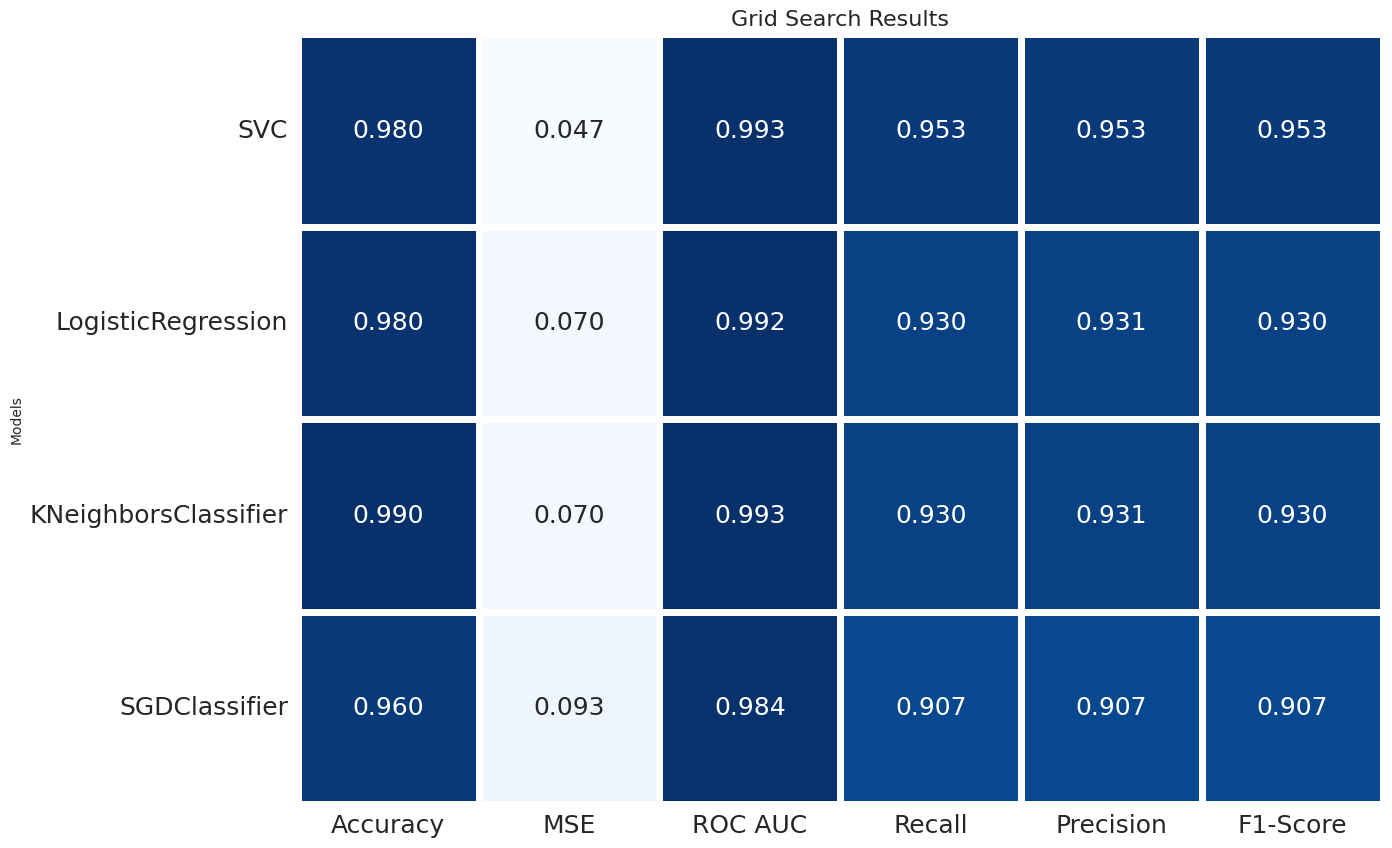

In [83]:
classifier = [
             SVC( probability = True),
             LogisticRegression(),
             KNeighborsClassifier(),
             SGDClassifier()]

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [0.1, 1,10,1000]}

logreg_param_grid = {"C":np.logspace(-4, 4, 20),
                    "penalty": ["l1","l2","none"]}

knn_param_grid = {"n_neighbors": np.linspace(2,20,12, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan","minkowski"],
                 "leaf_size": [1,10,30]}

sgdc_param_grid = {
    "loss" : ["log"],
    "alpha" : [0.0001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"]}



classifier_param = [
                   svc_param_grid,
                   logreg_param_grid,
                   knn_param_grid,
                   sgdc_param_grid]

cv_result = []
best_estimators = []
mean_squared_errors = []
roc_auc_scores = []
recall_scores = []
precision_scores = []
f1_scores = []


for i in range(len(classifier)):
    print("---------------------------------------------------------------------------")
    clf = GridSearchCV(classifier[i],
                       param_grid=classifier_param[i],
                       cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2)
    
    clf.fit(X_train,y_train)
    
    cv_result.append(clf.best_score_)
    
    mean_squared_errors.append(mean_squared_error(y_test,clf.predict(X_test)))
    
    roc_auc_scores.append(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'))
    
    recall_scores.append(recall_score(y_test, clf.predict(X_test), average='weighted'))
    
    precision_scores.append(precision_score(y_test, clf.predict(X_test), average='weighted'))
    
    f1_scores.append(f1_score(y_test, clf.predict(X_test), average='weighted'))
    
    best_estimators.append(clf.best_estimator_)
    
    print("Model: {}".format(classifier[i]))
    print("Accuracy: %{}".format(round(cv_result[i]*100,2)))
    print("MSE: {}".format(mean_squared_errors[i]))
    print("ROC AUC: {}".format(roc_auc_scores[i]))
    print("Recall: {}".format(recall_scores[i]))
    print("Precision: {}".format(precision_scores[i]))
    print("F1-Score: {}".format(f1_scores[i]))
    print("Best Estimator: {}".format(clf.best_estimator_))
    
print("---------------------------------------------------------------------------")

sns.set_style("darkgrid")
cv_results = pd.DataFrame({"Accuracy":cv_result,
                           "MSE":mean_squared_errors,
                           "ROC AUC":roc_auc_scores,
                           "Recall": recall_scores,
                           "Precision": precision_scores,
                           "F1-Score":f1_scores,
                           "Models":[
                                     "SVC",
                                  
                                     "LogisticRegression",
                                     "KNeighborsClassifier",
                                     "SGDClassifier"
                                   ]})

cv_results.index = cv_results["Models"]

cv_results  = cv_results.drop(["Models"], axis = 1)

f,ax = plt.subplots(figsize=(14,10))

sns.heatmap(cv_results, annot=True,cmap = "Blues",fmt= '.3f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 18})

plt.xticks(size = 18)
plt.yticks(size = 18, rotation = 0)
plt.ylabel("Models")
plt.title("Grid Search Results", size = 16)
plt.show()

In [84]:
best_estimators

[SVC(C=1, gamma=0.1, probability=True),
 LogisticRegression(C=0.615848211066026),
 KNeighborsClassifier(leaf_size=1, metric='euclidean', n_neighbors=8,
                      weights='distance'),
 SGDClassifier(alpha=0.01, loss='log', penalty='l1')]

/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


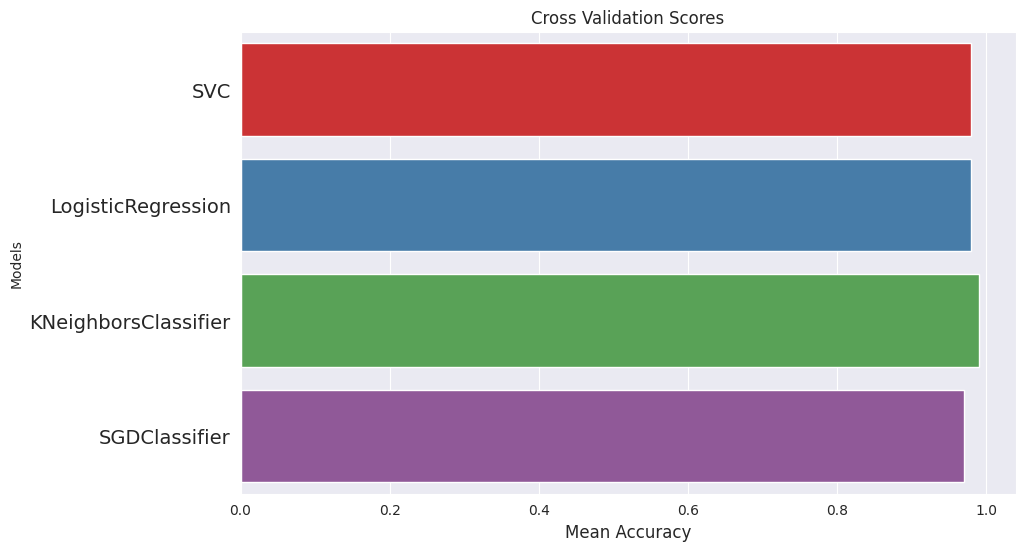

In [64]:
sns.set_style("darkgrid")
cv_results = pd.DataFrame({"Cross Validation Means":cv_result,
                           "Models":[ "SVC",
                                    
                                     "LogisticRegression",
                                     "KNeighborsClassifier",
                                     "SGDClassifier"
                                     ]})

plt.figure(figsize = (10,6))
sns.barplot("Cross Validation Means", "Models",
            data = cv_results, palette = "Set1")
plt.xlabel("Mean Accuracy",
           size = 12)
plt.yticks(size = 14)
plt.title("Cross Validation Scores",
          size = 12)
plt.show()

In [ ]:
# Best Estimator: KNeighborsClassifier(leaf_size=1, metric='euclidean', n_neighbors=8,
#                      weights='distance')


In [85]:
classifier = KNeighborsClassifier(leaf_size=1, metric='euclidean', n_neighbors=8,
                     weights='distance')

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.87      0.93      0.90        14
           2       0.92      0.85      0.88        13

    accuracy                           0.93        43
   macro avg       0.93      0.92      0.93        43
weighted avg       0.93      0.93      0.93        43



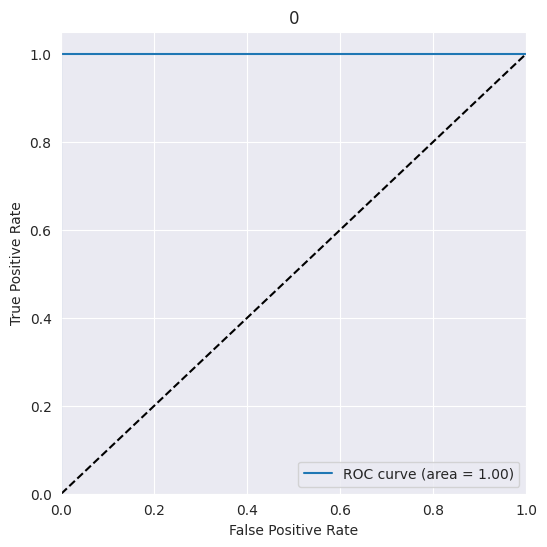

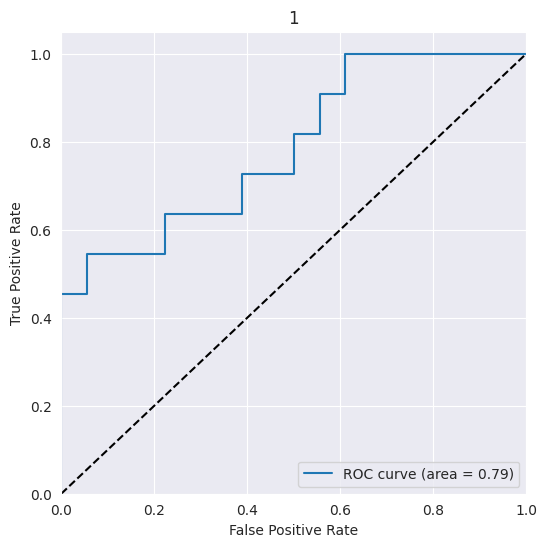

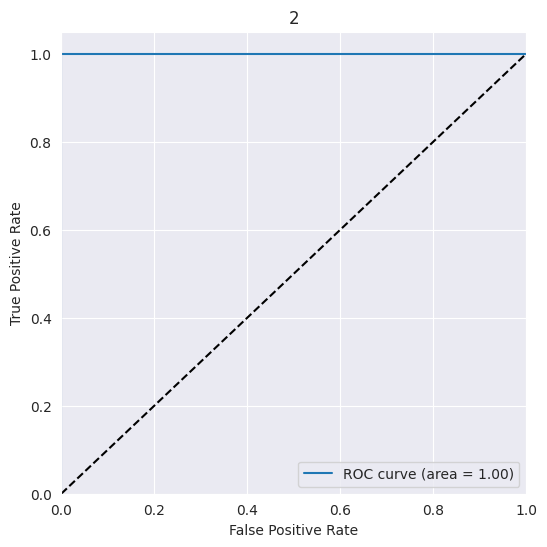

In [92]:
X = iris_df.iloc[:,0:4].values
y = iris_df.iloc[:,4].values
y = label_binarize(y, classes=[0,1,2])
n_classes = 3
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf = OneVsRestClassifier(best_estimators[1])
y_score = clf.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  y_score[:, i])
    roc_auc[i] = auc(fpr[i],
                     tpr[i])

for i in range(n_classes):
    plt.figure(figsize = (6,6))
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(i)
    plt.legend(loc="lower right")
    plt.show()

# SGD

In [126]:
sgd = make_pipeline(StandardScaler(), SGDClassifier())



In [127]:
sgd.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [128]:
y_predict_sgd = sgd.predict(X_test)


In [129]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score 

# KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier()

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
y_predict_knn=knn.predict(X_test)

In [45]:
y_predict_knn

array([2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 0, 0, 2, 2], dtype=int8)

In [50]:
score=knn.score(X_test,y_test)
print('accuracy:',score)

accuracy: 1.0


In [49]:
print(classification_report(y_test, y_predict_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        15

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores, pos_label=2)

In [65]:
!pip install scikit-plot

You should consider upgrading via the 'C:\Users\Mehr\AppData\Local\Programs\Python\Python39-32\python.exe -m pip install --upgrade pip' command.


In [75]:
# import scikitplot as skplt

# skplt.metrics.plot_roc_curve(y_test, )
# plt.show()

# NB

In [136]:
from sklearn.naive_bayes import GaussianNB
Nb=GaussianNB()

In [137]:
Nb.fit(X_train,y_train)

GaussianNB()

In [138]:
y_predict_Nb=Nb.predict(X_test)
y_predict_Nb

array([2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 0, 0, 2, 2], dtype=int8)

In [139]:
score=Nb.score(X_test,y_predict_Nb)
print('accuracy:',score)

accuracy: 1.0


In [140]:
print(classification_report(y_test, y_predict_Nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        15

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



In [143]:
y_predict_Nb=Nb.predict(X_train)


In [144]:
print(classification_report(y_train, y_predict_Nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.95      0.95        44
           2       0.94      0.94      0.94        34

    accuracy                           0.96       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.96      0.96      0.96       114



# perceptron

In [99]:
perceptron = Perceptron()

In [100]:
perceptron.fit(X_train,y_train)

Perceptron()

In [101]:
y_predict_per=perceptron.predict(X_test)

In [102]:
print(classification_report(y_test, y_predict_per))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       0.40      0.40      0.40         5
           2       1.00      0.73      0.85        15

    accuracy                           0.76        29
   macro avg       0.70      0.71      0.69        29
weighted avg       0.80      0.76      0.76        29



# logistic

In [122]:

log = LogisticRegression(C=10)
log.fit(X_train, y_train)
y_predict_log = log.predict(X_test)

C:\Users\Mehr\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [123]:
print(classification_report(y_test, y_predict_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        15

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



<AxesSubplot:>

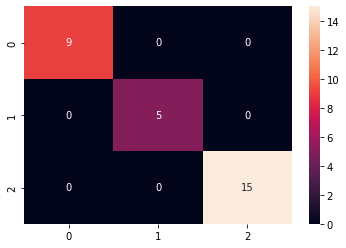

In [124]:
sns.heatmap(confusion_matrix(y_test, y_predict_log),annot=True)